
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

## Load the data into a DataFrame
# pd.read_csv()

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

/Users/elutins/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
iowa_liquor = pd.read_csv('/Users/elutins/Downloads/Iowa_Liquor_Sales_reduced.csv')
iowa_liquor.dtypes

/Users/elutins/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [3]:
# Reading in a file containing all true Iowa Zip codes.
iowa_locs = pd.read_csv('/Users/elutins/Desktop/GA/Project2/iowa_locations.csv')
iowa_locs.head()

,Zip Code,City,County
0,50001,Ackworth,Warren
1,50002,Adair,Adair
2,50003,Adel,Dallas
3,50005,Albion,Marshall
4,50006,Alden,Hardin


In [4]:
iowa_liquor.shape

(2709552, 18)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [5]:
codes = pd.to_numeric(iowa_locs['Zip Code']).sort_values(ascending=True).values
iowa_liquor = iowa_liquor[iowa_liquor['Zip Code'].isin(codes)]

In [6]:
iowa_liquor.shape

(98066, 18)

In [7]:
iowa_liquor['Date'] = pd.to_datetime(iowa_liquor['Date'])
iowa_liquor.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [8]:
len(iowa_liquor['Date'].sort_values(ascending=True))

98066

In [9]:
# count of duplicates
iowa_liquor.duplicated().sum()   

72

In [10]:
# display the duplicates now
iowa_liquor[iowa_liquor.duplicated()]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
365895,2016-02-01,2191,KEOKUK,52632,56.0,Lee,1031200.0,VODKA FLAVORED,380,41694,Uv Blue (raspberry) Vodka,1000,$7.50,$11.25,12,$135.00,12.00,3.17
366709,2016-01-28,5101,WATERLOO,50701,7.0,Black Hawk,1012100.0,CANADIAN WHISKIES,115,11776,Black Velvet,750,$5.23,$7.85,12,$94.20,9.00,2.38
366990,2016-01-28,5101,WATERLOO,50701,7.0,Black Hawk,1052010.0,IMPORTED GRAPE BRANDIES,420,48099,Hennessy VS,200,$5.65,$8.48,48,$407.04,9.60,2.54
367847,2016-01-28,4829,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,260,77683,Smirnoff Kissed Caramel,750,$8.25,$12.38,12,$148.56,9.00,2.38
368281,2016-01-28,4829,DES MOINES,50314,77.0,Polk,1081200.0,CREAM LIQUEURS,461,68127,Carolan's Irish Cream Liqueur,1000,$10.43,$15.65,12,$187.80,12.00,3.17
370301,2016-01-28,2582,MASON CITY,50401,17.0,Cerro Gordo,1701100.0,DECANTERS & SPECIALTY PACKAGES,130,64126,Disaronno Amaretto Cavalli Wrap,750,$8.32,$15.25,12,$183.00,9.00,2.38
370472,2016-01-28,5101,WATERLOO,50701,7.0,Black Hawk,1031080.0,VODKA 80 PROOF,297,35916,Five O'clock Vodka,750,$3.37,$5.06,12,$60.72,9.00,2.38
370614,2016-01-28,2190,DES MOINES,50314,77.0,Polk,1032080.0,IMPORTED VODKA,370,34001,Absolut Swedish Vodka 80 Prf Mini,600,$7.92,$11.88,1,$11.88,0.60,0.16
370782,2016-01-28,5101,WATERLOO,50701,7.0,Black Hawk,1032200.0,IMPORTED VODKA - MISC,260,64511,Ciroc Apple,375,$9.25,$13.88,12,$166.56,4.50,1.19
371309,2016-01-28,5101,WATERLOO,50701,7.0,Black Hawk,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,6,$64.80,10.50,2.77


In [11]:
# printing out column names
iowa_liquor.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [12]:
iowa_liquor.shape

(98066, 18)

In [13]:
# find summary statistics for each numerical column
iowa_liquor.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,98066.000000,97658.000000,9.806400e+04,98066.000000,98066.000000,98066.000000,98066.000000,98066.000000,98066.000000
mean,3603.190229,57.544850,1.045032e+06,255.770940,46034.537883,927.860135,9.900730,8.905685,2.352841
std,954.156536,28.231029,5.738532e+04,142.073824,56183.511716,754.500386,22.599351,25.047160,6.616736
min,2106.000000,1.000000,1.011100e+06,10.000000,173.000000,50.000000,1.000000,0.100000,0.030000
25%,2605.000000,31.000000,1.012200e+06,115.000000,26826.000000,750.000000,3.000000,1.750000,0.460000
50%,3731.000000,64.000000,1.031200e+06,260.000000,37998.000000,750.000000,6.000000,6.000000,1.590000
75%,4395.000000,78.000000,1.062310e+06,380.000000,64601.000000,1000.000000,12.000000,10.500000,2.770000
max,9013.000000,99.000000,1.701100e+06,978.000000,995507.000000,180000.000000,1800.000000,1800.000000,475.510000


In [14]:
# determine unique values in a column
print iowa_liquor['Category Name'].unique()      # return the unique values
iowa_liquor.nunique()      # count the number of unique values in each column

['IMPORTED VODKA - MISC' 'VODKA 80 PROOF' 'TENNESSEE WHISKIES'
 'WHISKEY LIQUEUR' 'VODKA FLAVORED' 'CANADIAN WHISKIES' 'BLENDED WHISKIES'
 'PUERTO RICO & VIRGIN ISLANDS RUM' 'STRAIGHT BOURBON WHISKIES'
 'IMPORTED SCHNAPPS' 'AMERICAN DRY GINS' 'IMPORTED VODKA'
 'PEPPERMINT SCHNAPPS' 'AMERICAN COCKTAILS' 'IRISH WHISKIES'
 'PEACH SCHNAPPS' nan 'MISC. IMPORTED CORDIALS & LIQUEURS'
 'SCOTCH WHISKIES' 'ROOT BEER SCHNAPPS' 'SPICED RUM' 'STRAWBERRY SCHNAPPS'
 'TRIPLE SEC' 'DISTILLED SPIRITS SPECIALTY' 'AMERICAN AMARETTO' 'TEQUILA'
 '100 PROOF VODKA' 'APRICOT BRANDIES' 'JAMAICA RUM' 'SINGLE MALT SCOTCH'
 'MISC. AMERICAN CORDIALS & LIQUEURS' 'FLAVORED RUM' 'CREAM LIQUEURS'
 'BLACKBERRY BRANDIES' 'IMPORTED GRAPE BRANDIES' 'WHITE CREME DE CACAO'
 'MISCELLANEOUS SCHNAPPS' 'GRAPE SCHNAPPS' 'FLAVORED GINS'
 'AMERICAN GRAPE BRANDIES' 'SINGLE BARREL BOURBON WHISKIES'
 'PEACH BRANDIES' 'IMPORTED DRY GINS' 'COFFEE LIQUEURS'
 'BUTTERSCOTCH SCHNAPPS' 'STRAIGHT RYE WHISKIES' 'GREEN CREME DE MENTHE'
 'CHERRY

Date                       12
Store Number             1084
City                      326
Zip Code                  353
County Number              98
County                     98
Category                   78
Category Name              69
Vendor Number              97
Item Number              2095
Item Description         1602
Bottle Volume (ml)         27
State Bottle Cost         844
State Bottle Retail       859
Bottles Sold               86
Sale (Dollars)           4597
Volume Sold (Liters)      182
Volume Sold (Gallons)     180
dtype: int64

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # HD!

In [16]:
iowa_liquor.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [17]:
# Rename columns to include $ sign label 
iowa_liquor.rename(columns={'State Bottle Retail': 'State Bottle Retail ($)', 'State Bottle Cost': 'State Bottle Cost ($)'}, inplace=True)


In [18]:
iowa_liquor.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost ($),State Bottle Retail ($),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
360448,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1032200.0,IMPORTED VODKA - MISC,395,35147,Three Olives Mango Flavored Vodka,750,$9.96,$14.94,12,$179.28,9.0,2.38
360449,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,260,37417,Popov Vodka 80 Prf,1000,$5.50,$8.25,12,$99.00,12.0,3.17
360450,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1011300.0,TENNESSEE WHISKIES,85,86672,Jack Daniel's Tennessee Honey,1000,$18.38,$27.57,12,$330.84,12.0,3.17
360451,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1032200.0,IMPORTED VODKA - MISC,395,36384,Three Olives Strawberry,750,$9.96,$14.94,12,$179.28,9.0,2.38
360452,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,$9.25,$13.88,12,$166.56,12.0,3.17


In [19]:
# Get rid of $ in each value
iowa_liquor['State Bottle Retail ($)'] = iowa_liquor['State Bottle Retail ($)'].str.replace('$', '')
iowa_liquor['State Bottle Cost ($)'] = iowa_liquor['State Bottle Cost ($)'].str.replace('$', '')

In [20]:
iowa_liquor['Sale (Dollars)'] = iowa_liquor['Sale (Dollars)'].str.replace('$', '')
iowa_liquor['Sale (Dollars)'] = iowa_liquor['Sale (Dollars)'].astype('float')

In [21]:
# change the data type of a column
iowa_liquor['State Bottle Cost ($)'] = iowa_liquor['State Bottle Cost ($)'].astype('float')
iowa_liquor['State Bottle Retail ($)'] = iowa_liquor['State Bottle Retail ($)'].astype('float')



In [22]:
iowa_liquor.dtypes

Date                       datetime64[ns]
Store Number                        int64
City                               object
Zip Code                           object
County Number                     float64
County                             object
Category                          float64
Category Name                      object
Vendor Number                       int64
Item Number                         int64
Item Description                   object
Bottle Volume (ml)                  int64
State Bottle Cost ($)             float64
State Bottle Retail ($)           float64
Bottles Sold                        int64
Sale (Dollars)                    float64
Volume Sold (Liters)              float64
Volume Sold (Gallons)             float64
dtype: object

In [23]:
iowa_liquor[['State Bottle Cost ($)', 'State Bottle Retail ($)']].describe()

,State Bottle Cost ($),State Bottle Retail ($)
count,98066.000000,98066.000000
mean,9.924877,14.901812
std,20.851329,31.276471
min,0.890000,1.340000
25%,5.510000,8.270000
50%,8.200000,12.300000
75%,11.990000,17.990000
max,6100.000000,9150.000000


In [24]:
# Creating new column of net profit per bottle for each bottle
iowa_liquor['State Profit Per Bottle ($)'] = iowa_liquor['State Bottle Retail ($)'] - iowa_liquor['State Bottle Cost ($)']


In [25]:
# General eda of all numerical columns: 

def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe index \n", dataframe.index
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape
    print "dataframe describe \n", dataframe.describe()
    for item in dataframe:
        print item
        print dataframe[item].nunique()

eda(iowa_liquor)

missing values 
Date                             0
Store Number                     0
City                             0
Zip Code                         0
County Number                  408
County                         408
Category                         2
Category Name                  196
Vendor Number                    0
Item Number                      0
Item Description                 0
Bottle Volume (ml)               0
State Bottle Cost ($)            0
State Bottle Retail ($)          0
Bottles Sold                     0
Sale (Dollars)                   0
Volume Sold (Liters)             0
Volume Sold (Gallons)            0
State Profit Per Bottle ($)      0
dtype: int64
dataframe index 
Int64Index([360448, 360449, 360450, 360451, 360452, 360453, 360454, 360455,
            360456, 360457,
            ...
            753654, 753655, 753656, 753657, 753658, 753659, 753660, 753661,
            753662, 753663],
           dtype='int64', length=98066)
dataframe types 
Date   

In [26]:
iowa_liquor.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost ($),State Bottle Retail ($),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),State Profit Per Bottle ($)
360448,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1032200.0,IMPORTED VODKA - MISC,395,35147,Three Olives Mango Flavored Vodka,750,9.96,14.94,12,179.28,9.0,2.38,4.98
360449,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,260,37417,Popov Vodka 80 Prf,1000,5.50,8.25,12,99.00,12.0,3.17,2.75
360450,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1011300.0,TENNESSEE WHISKIES,85,86672,Jack Daniel's Tennessee Honey,1000,18.38,27.57,12,330.84,12.0,3.17,9.19
360451,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1032200.0,IMPORTED VODKA - MISC,395,36384,Three Olives Strawberry,750,9.96,14.94,12,179.28,9.0,2.38,4.98
360452,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,9.25,13.88,12,166.56,12.0,3.17,4.63


In [27]:
iowa_liquor.groupby(['Vendor Number'])[['State Bottle Cost ($)', 'State Bottle Retail ($)']].describe()

State Bottle Cost ($)                                           \
                              count       mean           std    min      25%   
Vendor Number                                                                  
10                             14.0  11.000000  0.000000e+00  11.00  11.0000   
35                           4278.0  12.095598  6.311493e+00   2.50   8.2600   
55                           4652.0   6.031550  2.576870e+00   0.89   3.9700   
65                           9006.0   9.499082  5.487262e+00   1.05   6.3000   
85                           4728.0  13.024114  7.041433e+00   1.74   7.0000   
86                             20.0  12.553500  3.147752e+00   3.00  12.4325   
91                             41.0  16.069512  6.940210e+00   9.51   9.5100   
100                            52.0  17.840000  2.901026e+00  14.00  15.5900   
101                             7.0  12.004286  1.136924e+00  10.34  11.5050   
107                            11.0  15.167273  1.862198e+00  11.84  14.0000   
110                             1.0  17.500000           NaN  17.50  17.5000   
112                            17.0   7.520000  2.746540e-15   7.52   7.5200   
115                          5956.0   6.818590  3.210432e+00   1.00   5.2300   
116                             4.0  17.590000  0.000000e+00  17.59  17.5900   
118                             1.0  15.670000           NaN  15.67  15.6700   
121                            17.0  10.500000  0.000000e+00  10.50  10.5000   
122                             3.0   8.420000  1.662769e+00   7.46   7.4600   
125                           327.0  36.302232  3.363780e+02   8.89  17.5000   
128                             1.0  24.840000           NaN  24.84  24.8400   
130                           117.0  11.707179  3.360174e+00   4.50   8.3200   
136                             5.0  21.000000  0.000000e+00  21.00  21.0000   
154                           124.0   9.994032  2.558897e+00   3.75   9.0900   
163                            56.0  28.727500  2.399191e+01  15.00  15.0000   
166                             2.0  28.045000  9.270170e+00  21.49  24.7675   
184                            56.0  15.110000  4.356913e+00  10.81  10.8100   
192                          1096.0  12.761423  6.911467e+00   3.51   6.5200   
195                            58.0   6.244138  4.821699e-01   6.00   6.0000   
205                          3120.0   6.474378  2.921443e+00   1.04   3.5000   
207                             6.0  16.166667  1.654892e+00  14.30  14.7750   
208                           105.0  17.500000  0.000000e+00  17.50  17.5000   
...                             ...        ...           ...    ...      ...   
380                          3388.0   6.992355  2.635477e+00   3.45   5.5000   
381                            28.0  12.500000  0.000000e+00  12.50  12.5000   
384                           160.0  11.500000  0.000000e+00  11.50  11.5000   
389                           720.0  15.190250  1.245559e+01   3.24   8.3500   
391                            30.0  31.138000  1.464053e+01  19.00  19.0000   
394                            36.0  14.999444  2.323107e-03  14.99  15.0000   
395                          2797.0  10.219117  4.017762e+00   3.00   8.2000   
410                           680.0  21.319618  9.173280e+00   8.50  14.0000   
413                             1.0  20.210000           NaN  20.21  20.2100   
418                             2.0  10.500000  0.000000e+00  10.50  10.5000   
420                          1366.0  17.387233  1.165726e+01   5.65   9.9900   
421                          5011.0  10.637196  7.460470e+00   0.89   6.1600   
434                          9694.0   5.592455  2.289815e+00   1.15   3.8400   
446                             1.0  13.830000           NaN  13.83  13.8300   
448                             1.0  17.500000           NaN  17.50  17.5000   
451                            54.0   9.717407  3.025147e+00   6.41   6.5000   
460           

In [28]:
# determine unique values in a column
# users.occupation.nunique()      # count the number of unique values
# users.occupation.unique()      # return the unique values


In [29]:
iowa_liquor['Category'].nunique()

78

In [30]:
iowa_liquor['Vendor Number'].nunique()

97

In [31]:
# grouping by county, find summary stats for the State Bottle Cost
iowa_liquor.groupby('Category Name')[['State Bottle Cost ($)', 'State Bottle Retail ($)', 'State Profit Per Bottle ($)']].std()




,State Bottle Cost ($),State Bottle Retail ($),State Profit Per Bottle ($)
Category Name,,,
100 PROOF VODKA,2.792139,4.187255,1.395117
AMARETTO - IMPORTED,NaN,NaN,NaN
AMERICAN ALCOHOL,0.830050,1.243363,0.413313
AMERICAN AMARETTO,1.524036,2.287038,0.763004
AMERICAN COCKTAILS,1.810418,2.672546,0.866580
AMERICAN DRY GINS,3.208977,4.821366,1.613087
AMERICAN GRAPE BRANDIES,2.938608,4.433388,1.496978
AMERICAN SLOE GINS,1.804430,2.706016,0.901588
ANISETTE,0.117541,0.178662,0.061121


In [32]:
# providing a numerical match for each category name
# iowa_liquor['Catgeory Number'] = iowa_liquor['Category Name'].factorize()[0]
# do not want to factorize this, rather add dummy variable in future if necessary
iowa_liquor.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost ($),State Bottle Retail ($),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),State Profit Per Bottle ($)
360448,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1032200.0,IMPORTED VODKA - MISC,395,35147,Three Olives Mango Flavored Vodka,750,9.96,14.94,12,179.28,9.0,2.38,4.98
360449,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,260,37417,Popov Vodka 80 Prf,1000,5.50,8.25,12,99.00,12.0,3.17,2.75
360450,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1011300.0,TENNESSEE WHISKIES,85,86672,Jack Daniel's Tennessee Honey,1000,18.38,27.57,12,330.84,12.0,3.17,9.19
360451,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1032200.0,IMPORTED VODKA - MISC,395,36384,Three Olives Strawberry,750,9.96,14.94,12,179.28,9.0,2.38,4.98
360452,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,9.25,13.88,12,166.56,12.0,3.17,4.63


# Mine/Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [34]:
# dataframe of the most prominent counties in Iowa to show up in the data
pop_counties = iowa_liquor['County'].value_counts()
pop_counties

Polk             17251
Linn              7346
Scott             5774
Black Hawk        5651
Johnson           5112
Woodbury          4223
Story             4143
Dubuque           3436
Pottawattamie     3068
Cerro Gordo       2536
Wapello           1533
Buena Vista       1382
Dickinson         1368
Marshall          1311
Clinton           1308
Webster           1166
Marion            1074
Dallas            1015
Boone             1015
Bremer            1008
O'Brien            867
Clay               788
Plymouth           760
Kossuth            740
Warren             737
Poweshiek          731
Jasper             664
Carroll            661
Sioux              615
Des Moines         613
                 ...  
Washington         252
Lucas              246
Jackson            227
Mills              224
Cass               220
Shelby             212
Adair              207
Clarke             196
Henry              171
Worth              169
Osceola            164
Monroe             164
Hancock    

In [35]:
# bar graph representing the most prominent counties in dataset
# dropoff after Cerro Gordo 
# pop_counties.head(50).plot(kind='barh', width=0.4, figsize=(2,13))

In [36]:
# Top 6 most prominent counties 
pop_counties.head(6)

Polk          17251
Linn           7346
Scott          5774
Black Hawk     5651
Johnson        5112
Woodbury       4223
Name: County, dtype: int64

In [37]:
# most popular categories featured 
# pop_categories = iowa_liquor['Category Name'].value_counts()
# pop_categories.head(25).plot(kind='barh', width=0.4, figsize=(2,15))

In [38]:
print iowa_liquor['State Profit Per Bottle ($)'].describe()
iowa_liquor.shape

count    98066.000000
mean         4.976935
std         10.425390
min          0.450000
25%          2.770000
50%          4.100000
75%          6.000000
max       3050.000000
Name: State Profit Per Bottle ($), dtype: float64


(98066, 19)

In [39]:
# histogram of State Profit Per Bottle
# below code brings back weird histogram
#plt.hist(iowa_liquor['State Profit Per Bottle ($)'], bins=50)
# plt.ylabel=('Frequency')
# plt.xlabel=('Profit/Bottle ($)')
# plt.xlim([0,220])

In [40]:
# histogram sales data 
# only going to 350 bc thats where most of data is clustered, showing more of the graph will not showcase data clearly
# plt.hist(iowa_liquor['Sale (Dollars)'], bins=1000)
# plt.xlabel=('Sale ($)')
# plt.ylabel=('Frequency')
# plt.title('Histogram of Sales')
# plt.xlim([0, 350])

In [41]:
iowa_liquor.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost ($),State Bottle Retail ($),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),State Profit Per Bottle ($)
360448,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1032200.0,IMPORTED VODKA - MISC,395,35147,Three Olives Mango Flavored Vodka,750,9.96,14.94,12,179.28,9.0,2.38,4.98
360449,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,260,37417,Popov Vodka 80 Prf,1000,5.50,8.25,12,99.00,12.0,3.17,2.75
360450,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1011300.0,TENNESSEE WHISKIES,85,86672,Jack Daniel's Tennessee Honey,1000,18.38,27.57,12,330.84,12.0,3.17,9.19
360451,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1032200.0,IMPORTED VODKA - MISC,395,36384,Three Olives Strawberry,750,9.96,14.94,12,179.28,9.0,2.38,4.98
360452,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,9.25,13.88,12,166.56,12.0,3.17,4.63


In [42]:
iowa_liquor['Store Number'].nunique()

1084

In [43]:
# breaking down large table, forming new table of below columns based on city
city_table = iowa_liquor[['Store Number', 'City', 'Sale (Dollars)', 'State Bottle Retail ($)',
                         'State Profit Per Bottle ($)', 'Bottles Sold', 'Volume Sold (Liters)',
                        ]]

In [44]:
city_table.head()

,Store Number,City,Sale (Dollars),State Bottle Retail ($),State Profit Per Bottle ($),Bottles Sold,Volume Sold (Liters)
360448,3952,BETTENDORF,179.28,14.94,4.98,12,9.0
360449,3952,BETTENDORF,99.00,8.25,2.75,12,12.0
360450,3952,BETTENDORF,330.84,27.57,9.19,12,12.0
360451,3952,BETTENDORF,179.28,14.94,4.98,12,9.0
360452,3952,BETTENDORF,166.56,13.88,4.63,12,12.0


In [45]:
county_table = iowa_liquor[['Store Number', 'County', 'Sale (Dollars)', 'State Bottle Retail ($)',
                         'State Profit Per Bottle ($)', 'Bottles Sold', 'Volume Sold (Liters)',
                        ]]

In [46]:
zcode_table = iowa_liquor[['Store Number', 'Zip Code', 'Sale (Dollars)', 'State Bottle Retail ($)',
                         'State Profit Per Bottle ($)', 'Bottles Sold', 'Volume Sold (Liters)',
                        ]]

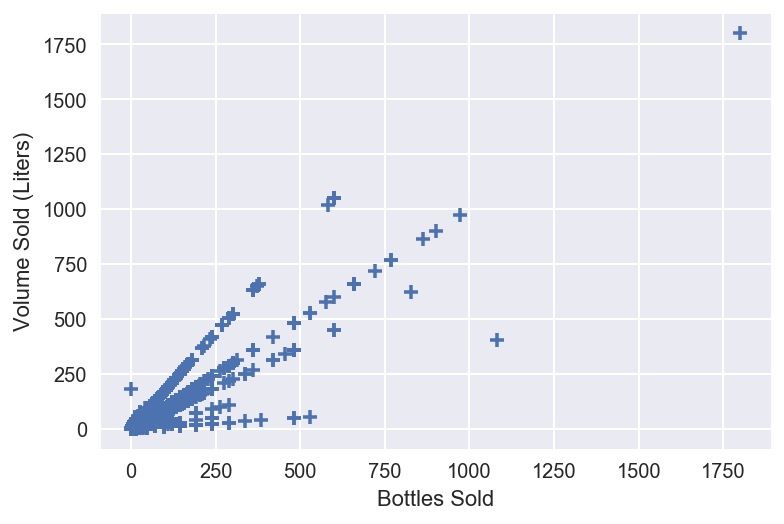

In [47]:
# plotting relationship to see if any outliers exist
plt.scatter(x=zcode_table['Bottles Sold'], y=zcode_table['Volume Sold (Liters)'], marker='+')
plt.xlabel('Bottles Sold')
plt.ylabel('Volume Sold (Liters)')

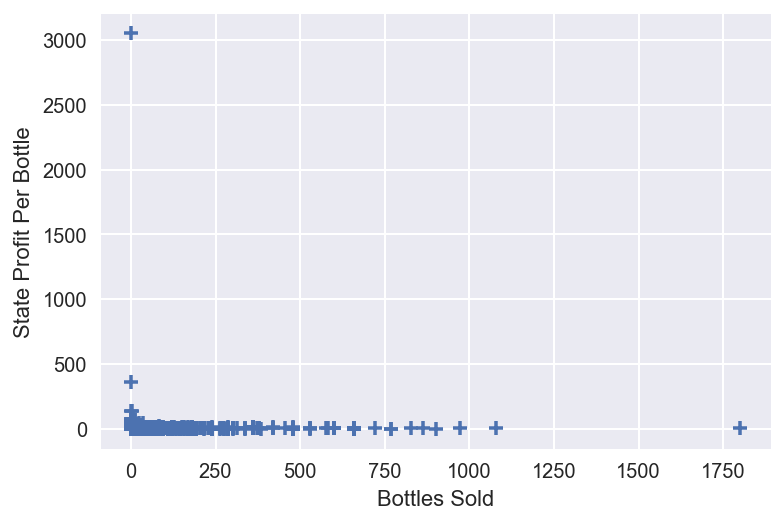

In [48]:
# plotting relationship to see if any outliers exist
plt.scatter(x=zcode_table['Bottles Sold'], y=zcode_table['State Profit Per Bottle ($)'], marker='+')
plt.xlabel('Bottles Sold')
plt.ylabel('State Profit Per Bottle')

# interesting relationship

In [49]:
# Making a table of the top 100 producing stores, by sales, with their resepctive zip codes.
# sales_by_zip = zcode_table[['Zip Code', 'Store Number', 'Sale (Dollars)']].sort_values(by='Sale (Dollars)', ascending=0).head(100)
# print sales_by_zip['Zip Code'].nunique() 
# print sales_by_zip['Store Number'].nunique()

Forming a new dataframe, grouped by zip code, and then the sum of Sale (Dollars) for each zip code. This will tell
me what zip codes are paying the most for liquor. 

In [50]:
sales_by_zip = zcode_table.groupby('Zip Code')['Sale (Dollars)'].sum().to_frame().sort_values('Sale (Dollars)', ascending=0)
# sales_by_zip.reindex(index=None, columns=('Zip Code', 'Sale (Dollars)'))
sales_by_zip
sales_by_zip['Zip Code'] = sales_by_zip.index

In [51]:
# creating an index of range 0 - length of the 
sales_by_zip.index = range(0, len(sales_by_zip))

In [52]:
print sales_by_zip.shape
sales_by_zip.head()

(353, 2)


,Sale (Dollars),Zip Code
0,499963.92,50314
1,480080.79,52402
2,446777.07,50320
3,410914.92,50010
4,372932.84,52240


In [53]:
volume_by_zip = zcode_table.groupby('Zip Code')['Volume Sold (Liters)'].sum().to_frame()
volume_by_zip['Zip Code'] = volume_by_zip.index
volume_by_zip.index = range(0, len(volume_by_zip))
volume_by_zip.head()

,Volume Sold (Liters),Zip Code
0,111.75,50002
1,1151.90,50003
2,300.50,50006
3,5979.28,50009
4,27529.29,50010


In [54]:
bottleprofit_per_zip = zcode_table.groupby('Zip Code')['State Profit Per Bottle ($)'].sum().to_frame()
bottleprofit_per_zip['Zip Code'] = bottleprofit_per_zip.index
bottleprofit_per_zip.index = range(0, len(bottleprofit_per_zip))
bottleprofit_per_zip.head()

,State Profit Per Bottle ($),Zip Code
0,54.34,50002
1,523.22,50003
2,261.96,50006
3,3173.83,50009
4,17214.54,50010


Forming a second dataframe, grouped by zip code again, calculating the number of stores within each zip code

In [55]:
stores_by_zip = iowa_liquor.groupby('Zip Code')['Store Number'].nunique().to_frame().sort_values('Store Number', ascending=False)
stores_by_zip['Zip Code'] = stores_by_zip.index
stores_by_zip.index = range(0, len(stores_by_zip))
stores_by_zip.head()

,Store Number,Zip Code
0,22,52404
1,21,52402
2,20,50010
3,20,52240
4,16,50613


In [56]:
bottles_by_zip = iowa_liquor.groupby('Zip Code')['Bottles Sold'].sum().to_frame()
bottles_by_zip['Zip Code'] = bottles_by_zip.index
bottles_by_zip.index = range(0, len(stores_by_zip))
bottles_by_zip.head()

,Bottles Sold,Zip Code
0,165,50002
1,1294,50003
2,251,50006
3,6470,50009
4,28306,50010


In [57]:
# renaming column to appropriate description
stores_by_zip.rename(columns={'Store Number' : 'Number of Stores Per Zip'}, inplace=True)
stores_by_zip.head()

,Number of Stores Per Zip,Zip Code
0,22,52404
1,21,52402
2,20,50010
3,20,52240
4,16,50613


Now merging the two dataframes, to show the Number of Stores and Total Sales Per Zip Code

In [58]:
zip_frame = pd.merge(stores_by_zip, sales_by_zip, how='inner', on='Zip Code')
print zip_frame.shape
zip_frame.head()

(353, 3)


,Number of Stores Per Zip,Zip Code,Sale (Dollars)
0,22,52404,201312.23
1,21,52402,480080.79
2,20,50010,410914.92
3,20,52240,372932.84
4,16,50613,257986.28


In [59]:
zip_frame = pd.merge(zip_frame, volume_by_zip, how='inner', on='Zip Code')
print zip_frame.shape
zip_frame.head()

(353, 4)


,Number of Stores Per Zip,Zip Code,Sale (Dollars),Volume Sold (Liters)
0,22,52404,201312.23,13754.80
1,21,52402,480080.79,30817.96
2,20,50010,410914.92,27529.29
3,20,52240,372932.84,24059.48
4,16,50613,257986.28,17975.38


In [60]:
zip_frame = pd.merge(zip_frame, bottleprofit_per_zip, how='inner', on='Zip Code')
print zip_frame.shape
zip_frame.head()

(353, 5)


,Number of Stores Per Zip,Zip Code,Sale (Dollars),Volume Sold (Liters),State Profit Per Bottle ($)
0,22,52404,201312.23,13754.80,7850.98
1,21,52402,480080.79,30817.96,10162.97
2,20,50010,410914.92,27529.29,17214.54
3,20,52240,372932.84,24059.48,11774.57
4,16,50613,257986.28,17975.38,11607.05


In [61]:
# re-ordering column names for personal preference.
zip_frame = zip_frame[['Zip Code', 'Number of Stores Per Zip', 'Sale (Dollars)', 'Volume Sold (Liters)', 'State Profit Per Bottle ($)']]
zip_frame.head()

,Zip Code,Number of Stores Per Zip,Sale (Dollars),Volume Sold (Liters),State Profit Per Bottle ($)
0,52404,22,201312.23,13754.80,7850.98
1,52402,21,480080.79,30817.96,10162.97
2,50010,20,410914.92,27529.29,17214.54
3,52240,20,372932.84,24059.48,11774.57
4,50613,16,257986.28,17975.38,11607.05


In [62]:
zip_frame['Sales Per Store'] = zip_frame['Sale (Dollars)'] / zip_frame['Number of Stores Per Zip']
zip_frame.head()

,Zip Code,Number of Stores Per Zip,Sale (Dollars),Volume Sold (Liters),State Profit Per Bottle ($),Sales Per Store
0,52404,22,201312.23,13754.80,7850.98,9150.555909
1,52402,21,480080.79,30817.96,10162.97,22860.990000
2,50010,20,410914.92,27529.29,17214.54,20545.746000
3,52240,20,372932.84,24059.48,11774.57,18646.642000
4,50613,16,257986.28,17975.38,11607.05,16124.142500


In [63]:
zip_frame = pd.merge(zip_frame, bottles_by_zip, how='inner', on='Zip Code')
print zip_frame.shape
zip_frame.head()

(353, 7)


,Zip Code,Number of Stores Per Zip,Sale (Dollars),Volume Sold (Liters),State Profit Per Bottle ($),Sales Per Store,Bottles Sold
0,52404,22,201312.23,13754.80,7850.98,9150.555909,17576
1,52402,21,480080.79,30817.96,10162.97,22860.990000,32602
2,50010,20,410914.92,27529.29,17214.54,20545.746000,28306
3,52240,20,372932.84,24059.48,11774.57,18646.642000,28249
4,50613,16,257986.28,17975.38,11607.05,16124.142500,19060


In [64]:
zip_frame.rename(columns={'Sale (Dollars)' : 'Total Sales ($)'}, inplace=True)
zip_frame.head()

,Zip Code,Number of Stores Per Zip,Total Sales ($),Volume Sold (Liters),State Profit Per Bottle ($),Sales Per Store,Bottles Sold
0,52404,22,201312.23,13754.80,7850.98,9150.555909,17576
1,52402,21,480080.79,30817.96,10162.97,22860.990000,32602
2,50010,20,410914.92,27529.29,17214.54,20545.746000,28306
3,52240,20,372932.84,24059.48,11774.57,18646.642000,28249
4,50613,16,257986.28,17975.38,11607.05,16124.142500,19060


In [65]:
# Re-naming the dataframe to only inlcude the top 100 selling zip codes.
zip_frame = zip_frame.sort_values('Total Sales ($)', ascending=0)
zip_frame = zip_frame[['Zip Code', 'Number of Stores Per Zip', 'Total Sales ($)', 'Volume Sold (Liters)', 'State Profit Per Bottle ($)', 'Sales Per Store', 'Bottles Sold']]
zip_frame

,Zip Code,Number of Stores Per Zip,Total Sales ($),Volume Sold (Liters),State Profit Per Bottle ($),Sales Per Store,Bottles Sold
59,50314,5,499963.92,26945.04,8955.03,99992.784000,32912
1,52402,21,480080.79,30817.96,10162.97,22860.990000,32602
46,50320,6,446777.07,28528.98,6010.26,74462.845000,29615
2,50010,20,410914.92,27529.29,17214.54,20545.746000,28306
3,52240,20,372932.84,24059.48,11774.57,18646.642000,28249
34,50311,7,313692.91,19235.80,6661.40,44813.272857,19140
32,52807,8,284905.19,17017.08,7257.00,35613.148750,17871
6,52001,15,265149.72,18221.36,10200.79,17676.648000,19473
4,50613,16,257986.28,17975.38,11607.05,16124.142500,19060
70,52002,5,257449.15,15748.87,3129.39,51489.830000,15920


In [66]:
# creating dummy variables for the top 100 zip codes
zcode_dummies = pd.get_dummies(zip_frame['Zip Code'], drop_first=True)
zip_frame = pd.concat([zip_frame, zcode_dummies], axis=1)
zip_frame.head()
# dummy variables dropped zip code 50009

,Zip Code,Number of Stores Per Zip,Total Sales ($),Volume Sold (Liters),State Profit Per Bottle ($),Sales Per Store,Bottles Sold,50003,50006,50009,...,52768,52772,52776,52777,52778,52802,52803,52804,52806,52807
59,50314,5,499963.92,26945.04,8955.03,99992.784,32912,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52402,21,480080.79,30817.96,10162.97,22860.990,32602,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,50320,6,446777.07,28528.98,6010.26,74462.845,29615,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50010,20,410914.92,27529.29,17214.54,20545.746,28306,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52240,20,372932.84,24059.48,11774.57,18646.642,28249,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
zip_frame.sort_values('Zip Code', ascending=True).head()

,Zip Code,Number of Stores Per Zip,Total Sales ($),Volume Sold (Liters),State Profit Per Bottle ($),Sales Per Store,Bottles Sold,50003,50006,50009,...,52768,52772,52776,52777,52778,52802,52803,52804,52806,52807
236,50002,1,1559.34,111.75,54.34,1559.34000,165,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,50003,3,15920.28,1151.90,523.22,5306.76000,1294,1,0,0,...,0,0,0,0,0,0,0,0,0,0
269,50006,1,3809.87,300.50,261.96,3809.87000,251,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30,50009,8,81283.97,5979.28,3173.83,10160.49625,6470,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,50010,20,410914.92,27529.29,17214.54,20545.74600,28306,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Build/Plot your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [68]:
from sklearn import linear_model

In [69]:
X = zip_frame[['State Profit Per Bottle ($)', 'Number of Stores Per Zip', 'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store']]
y = zip_frame['Total Sales ($)']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [70]:
predictions = lm.predict(X)
print(predictions)

[  4.58811957e+05   4.80665369e+05   4.68982316e+05   4.13558573e+05
   3.74790822e+05   3.05946777e+05   2.69044715e+05   2.76577622e+05
   2.68844956e+05   2.57809978e+05   2.16713095e+05   1.87162617e+05
   2.50031942e+05   2.19599023e+05   1.95122643e+05   2.17212394e+05
   1.82528993e+05   2.07481822e+05   2.14408686e+05   1.91948767e+05
   1.85737086e+05   1.60478334e+05   1.71642056e+05   1.36570334e+05
   1.57830040e+05   1.47726875e+05   1.37949595e+05   1.35146789e+05
   1.36923915e+05   1.13434643e+05   9.51330157e+04   1.01844588e+05
   9.98438943e+04   1.08610936e+05   1.08610654e+05   1.15576282e+05
   1.01716095e+05   9.05461461e+04   6.58734908e+04   8.85990743e+04
   7.35186331e+04   8.98737939e+04   9.03862272e+04   7.85517133e+04
   7.18345524e+04   7.93546288e+04   8.38559537e+04   8.53739795e+04
   8.59520457e+04   6.76276650e+04   8.66716574e+04   7.31287853e+04
   6.52462412e+04   7.77023722e+04   6.75606954e+04   7.42088535e+04
   6.61067574e+04   8.01851417e+04

In [71]:
lm.score(X,y) # this is the R^2 number, referring to the amount of variance explained in the above model

0.99186653641764888

# Fitting a MLR Model.  

The below code is the Fitting of a MLR Model utilizing Bottles Sold, Volume Sold (Liters), State Bottle Retail, and State Profit per Bottle.  

In [72]:
X = iowa_liquor[['State Profit Per Bottle ($)', 'Volume Sold (Liters)', 'State Bottle Retail ($)', 'Bottles Sold']]
y = iowa_liquor['Sale (Dollars)']
X = sm.add_constant(X) # adding y-intercept

model = sm.OLS(y, X).fit()  ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sale (Dollars)   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 7.627e+04
Date:                Wed, 19 Jul 2017   Prob (F-statistic):               0.00
Time:                        18:36:12   Log-Likelihood:            -6.6247e+05
No. Observations:               98066   AIC:                         1.325e+06
Df Residuals:                   98061   BIC:                         1.325e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -32.3345      0.806    -40.126      0.000     -33.914     -30.755
State Profit Per Bottle ($)  -101.8143     11.312     -9.000      0.000    -123.986     -79.642
Volume Sold (Liters)            9.1224      0.059    154.690      0.000       9.007       9.238
State Bottle Retail ($)        35.3579      3.771      9.377      0.000      27.968      42.748
Bottles Sold                    6.4004      0.065     97.969      0.000       6.272       6.528
==============================================================================
Omnibus:                   179198.020   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3629475073.374
Skew:                          12.490   Prob(JB):                         0.00
Kurtosis:                     945.141   Cond. No.                         699.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

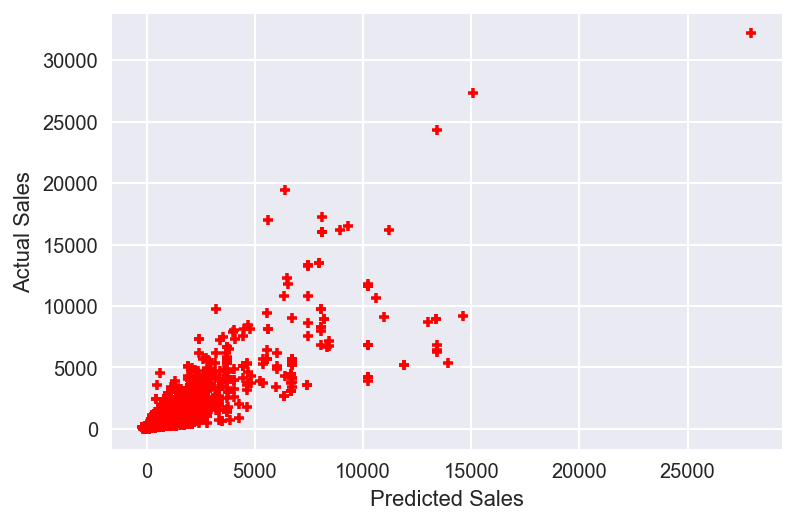

MSE: 3292679351.43


In [73]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel('Predicted Sales')
plt.ylabel("Actual Sales")
plt.show()
print "MSE:", model.mse_model

The below code utilizes MLR to predict Total Sales. The Predictors; Number of Stores, Volums Sold, State Profit Per Bottle, and Sales Per Store are all sorted by zip code 

In [74]:
# Fitting a MLR Model utilizing variables
X = zip_frame[['State Profit Per Bottle ($)', 'Number of Stores Per Zip', 'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store']]
y = zip_frame['Total Sales ($)']
X = sm.add_constant(X) # adding y-intercept


model = sm.OLS(y, X).fit()  ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total Sales ($)   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     8463.
Date:                Wed, 19 Jul 2017   Prob (F-statistic):               0.00
Time:                        18:36:13   Log-Likelihood:                -3604.1
No. Observations:                 353   AIC:                             7220.
Df Residuals:                     347   BIC:                             7243.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1512.2144    663.269     -2.280      0.023   -2816.747    -207.682
State Profit Per Bottle ($)    -1.5041      0.529     -2.845      0.005      -2.544      -0.464
Number of Stores Per Zip     -799.0835    282.968     -2.824      0.005   -1355.632    -242.535
Volume Sold (Liters)           13.3793      0.557     24.002      0.000      12.283      14.476
Bottles Sold                    2.9950      0.505      5.935      0.000       2.002       3.988
Sales Per Store                 0.1871      0.056      3.334      0.001       0.077       0.298
==============================================================================
Omnibus:                      219.205   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5061.067
Skew:                           2.136   Prob(JB):                         0.00
Kurtosis:                      21.051   Cond. No.                     2.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the above model summary statistics, the p-values of 'Volume Sold', 'Bottles Sold', and 'Sales Per Store', are all statistically significant factors in predicting Total Sales.

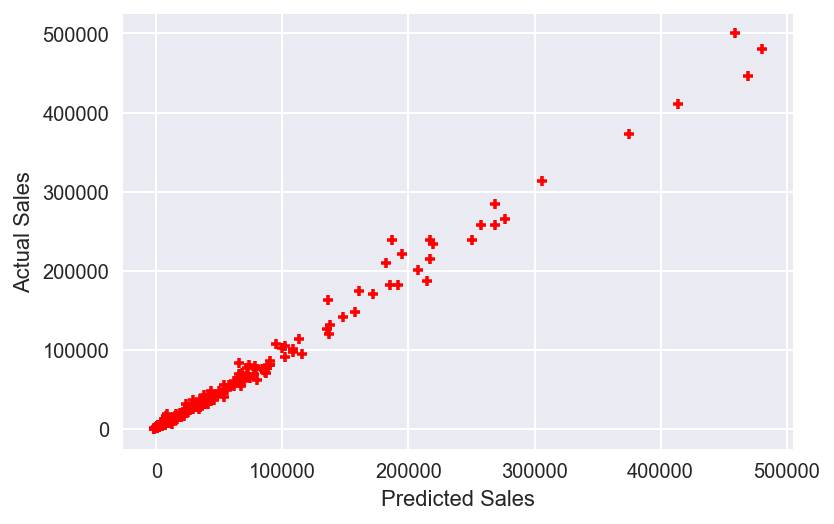

MSE: 372125375821.0


In [75]:
# Plot the model of bottles sold, state profit per bottle, state bottle retail, number of stores per zip, volume
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel('Predicted Sales')
plt.ylabel("Actual Sales")
plt.show()
print "MSE:", model.mse_model

# Fitting a Training-Test Split Model

In [76]:
# Splitting data into trainig and test data, using k-folds cv to test data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model

In [77]:
X = iowa_liquor[['State Profit Per Bottle ($)', 'Volume Sold (Liters)', 'State Bottle Retail ($)', 'Bottles Sold']]
y = iowa_liquor['Sale (Dollars)']

In [78]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # test data will be 30% of entire df
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(68646, 4) (68646,)
(29420, 4) (29420,)


In [79]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Score: 0.49324200523


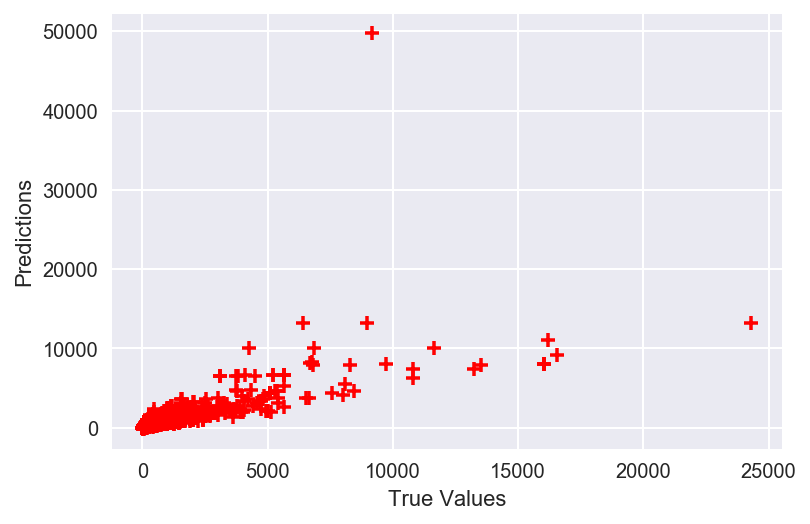

In [80]:
plt.scatter(y_test, predictions, marker='+', color='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")
print "Score:", model.score(X_test, y_test) 

The below code runs a Train-Test Model for Predictors sorted by Zip Code

In [81]:
# define X and y
X = zip_frame[['State Profit Per Bottle ($)', 'Number of Stores Per Zip', 'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store']]
y = zip_frame['Total Sales ($)']

In [82]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # test data will be 30% of entire df
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(247, 5) (247,)
(106, 5) (106,)


In [83]:
# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Score: 0.984227960341


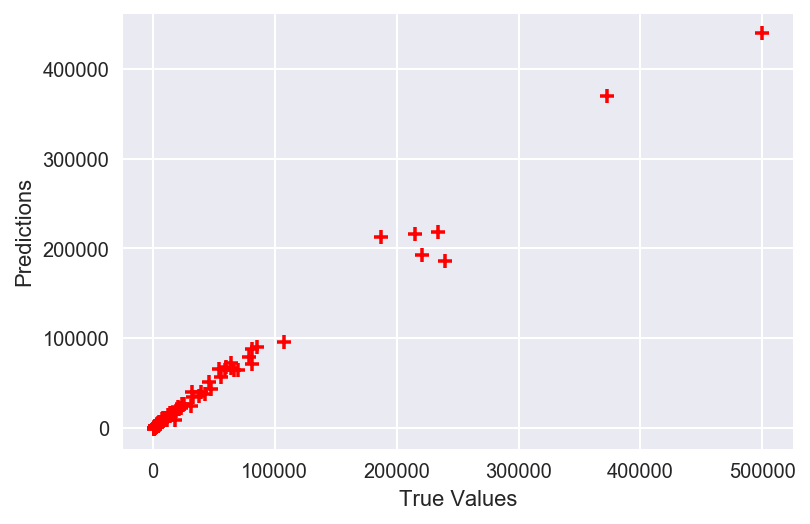

In [84]:
## The line / model
plt.scatter(y_test, predictions, marker='+', color='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")
print "Score:", model.score(X_test, y_test) 

# Fitting a Train-Test Split Model Utilizing Cross-Validation

The code below runs a 10-Fold Cross Validation on Predictors not sorted by Zip Code

In [85]:
X = iowa_liquor[['State Profit Per Bottle ($)', 'Volume Sold (Liters)', 'State Bottle Retail ($)', 'Bottles Sold']]
y = iowa_liquor['Sale (Dollars)']

In [86]:
scores = cross_val_score(model, X_train, y_train, cv=10)
print "Cross-validated scores:", scores
print "Average: ", scores.mean()

Cross-validated scores: [ 0.98988706  0.9486613   0.99648221  0.98600428  0.98972142  0.99497092
  0.99435634  0.99481542  0.99022536  0.98352796]
Average:  0.986865226686


Cross-Predicted Accuracy: 0.617480090334


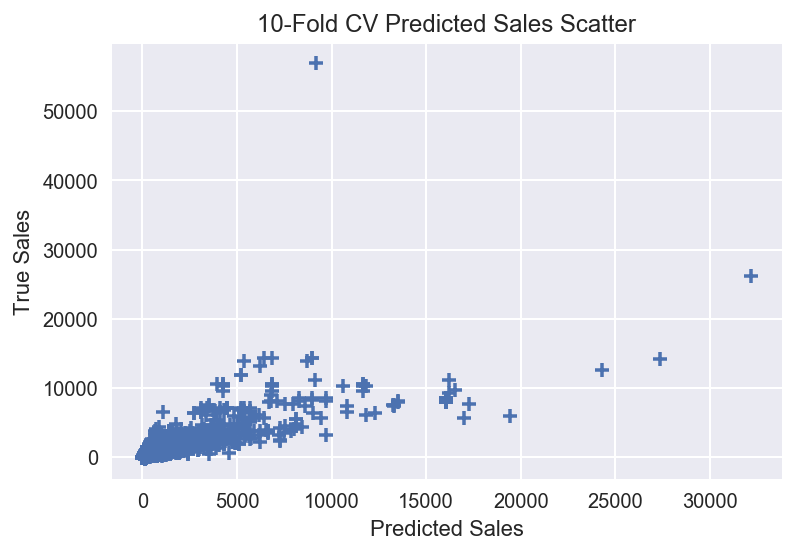

In [87]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=10)
plt.scatter(y, predictions, marker='+')
plt.ylabel('True Sales')
plt.xlabel('Predicted Sales')
plt.title('10-Fold CV Predicted Sales Scatter')
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

The code below runs a Train-Test 10 Fold Cross Validation on Predictors sorted by Zip Code

In [88]:
# define X and y
X = zip_frame[['State Profit Per Bottle ($)', 'Number of Stores Per Zip', 'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store']]
y = zip_frame['Total Sales ($)']

In [89]:
# Perform 10-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=10)
print "Cross-validated scores:", scores
print "Average: ", scores.mean()

Cross-validated scores: [ 0.98988706  0.9486613   0.99648221  0.98600428  0.98972142  0.99497092
  0.99435634  0.99481542  0.99022536  0.98352796]
Average:  0.986865226686


Cross-Predicted Accuracy: 0.962545273683


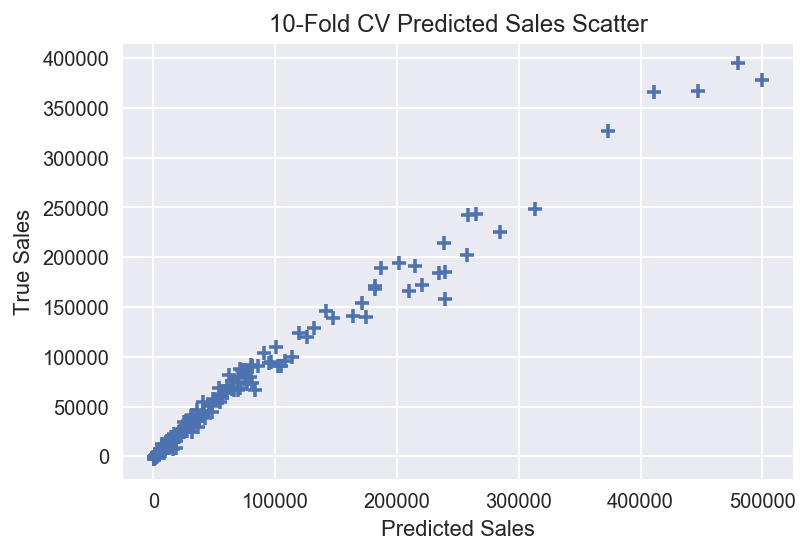

In [90]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=10)
plt.scatter(y, predictions, marker='+')
plt.ylabel('True Sales')
plt.xlabel('Predicted Sales')
plt.title('10-Fold CV Predicted Sales Scatter')
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

# Fitting a Ridge Regression Model

In [91]:
from sklearn.linear_model import Ridge # capital R with Ridge
from sklearn.linear_model import RidgeCV
from sklearn import metrics
import numpy as np

The below code runs a Ridge Regression Model for Predictors not Sorted by Zip Code

In [92]:
X = iowa_liquor[['State Profit Per Bottle ($)', 'Volume Sold (Liters)', 'State Bottle Retail ($)', 'Bottles Sold']]
y = iowa_liquor['Sale (Dollars)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [93]:
# select the best alpha with RidgeCV
alpha_range = 10.**np.arange(-2, 3)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [94]:
# Run the Ridge regression with the optimal Alpha = 0.01
# in sklearn, LAMBDA = ALPHA, WHICH IS WHY WE GET SAME RESULT AS ABOVE WHEN ALPHA=0, REGULARIZATION HAS NO EFFECT
ridgereg = Ridge(alpha=0.01, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

297.87415773


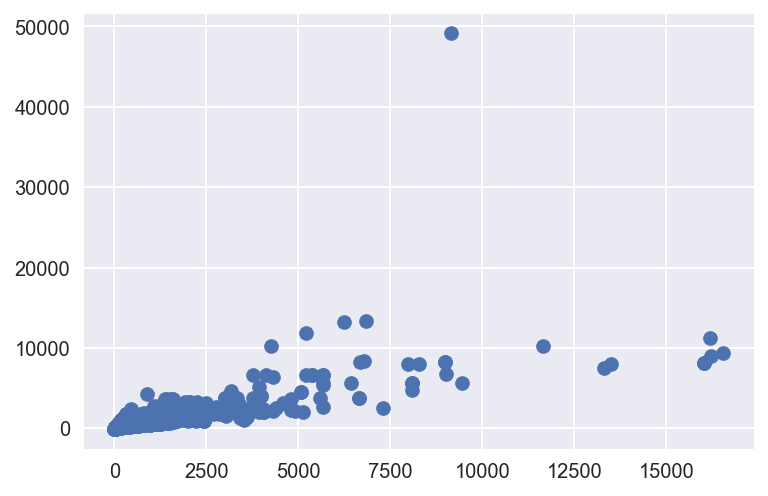

In [95]:
plt.scatter(y_test, y_pred)

# The below code runs a Ridge Regression for Predictors Sorted by Zip Code

In [96]:
# define X and y
X = zip_frame[['State Profit Per Bottle ($)', 'Volume Sold (Liters)' , 'Number of Stores Per Zip', 'Bottles Sold', 'Sales Per Store']]
y = zip_frame['Total Sales ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [97]:
# select the best alpha with RidgeCV
alpha_range = 10.**np.arange(-2, 3)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [98]:
# Run the Ridge regression with the optimal Alpha = 0.01
# in sklearn, LAMBDA = ALPHA, WHICH IS WHY WE GET SAME RESULT AS ABOVE WHEN ALPHA=0, REGULARIZATION HAS NO EFFECT
ridgereg = Ridge(alpha=0.01, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

8837.29547746


In [99]:
# examine the coefficients
rc = ridgeregcv.coef_
print rc

[ -1.14976445e+00   1.05043769e+01  -1.17749698e+03   5.41044872e+00
   3.01625745e-01]


In [100]:
zip(X.columns, rc)

[('State Profit Per Bottle ($)', -1.1497644505359488),
 ('Volume Sold (Liters)', 10.504376930298623),
 ('Number of Stores Per Zip', -1177.4969843008616),
 ('Bottles Sold', 5.4104487153194949),
 ('Sales Per Store', 0.3016257454646506)]

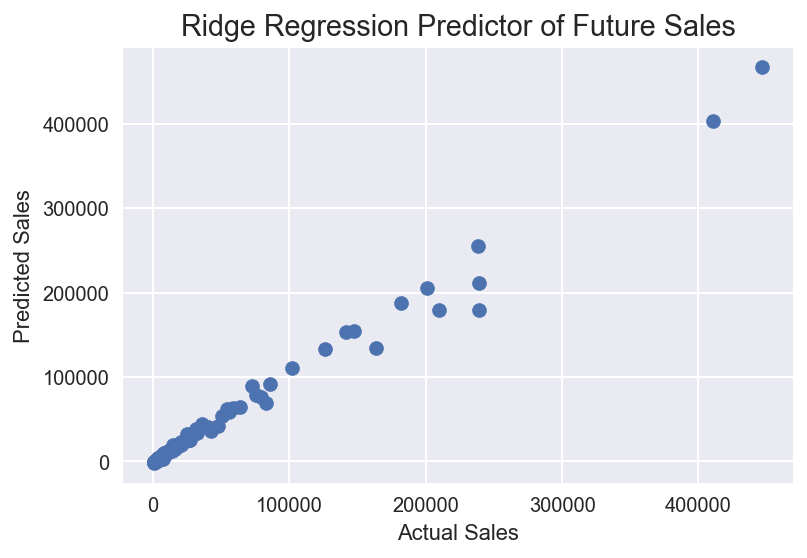

In [101]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Ridge Regression Predictor of Future Sales', fontsize='x-large')

# Fitting a Lasso Regression Model

In [102]:
from sklearn.linear_model import LassoCV

In [103]:
from sklearn.linear_model import Lasso

The code below runs a Lasso Regression Model for Predictors Not Sorted by Zip Code

In [104]:
X = iowa_liquor[['State Profit Per Bottle ($)', 'Volume Sold (Liters)', 'State Bottle Retail ($)', 'Bottles Sold']]
y = iowa_liquor['Sale (Dollars)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [105]:
# select the best alpha with LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

0.14370352190855681

In [106]:
# examine the coefficients
lc = lassoregcv.coef_

In [107]:
zip(X.columns, lc)

[('State Profit Per Bottle ($)', 0.0),
 ('Volume Sold (Liters)', 9.1930274729680796),
 ('State Bottle Retail ($)', 0.21568623811659668),
 ('Bottles Sold', 5.2541503699419456)]

In [108]:
# fitting model using the pre-determined optimal alpha value
y_pred = lassoregcv.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

204.81884081


In [109]:
lassoreg = Lasso(alpha=0.0016, normalize=True)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.0016, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

(0, 30000)

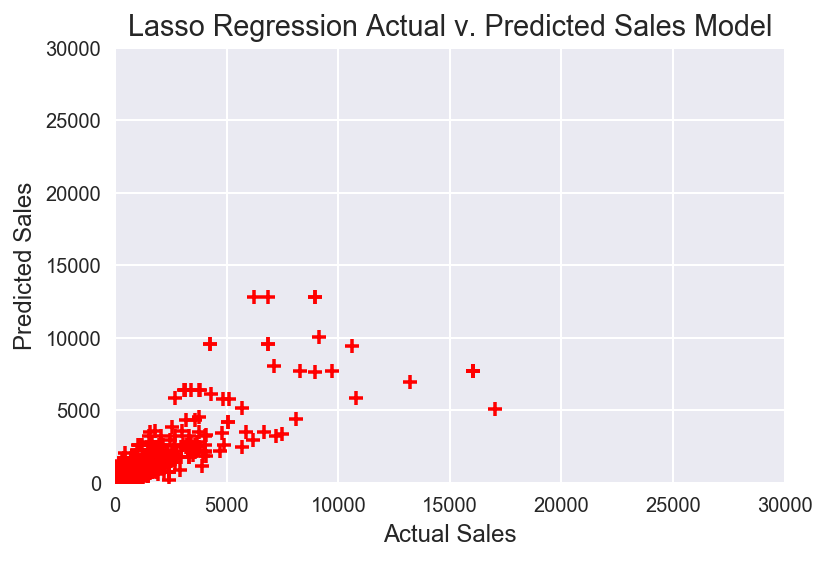

In [110]:
plt.scatter(y_test, y_pred, marker="+", color='red')
plt.xlabel('Actual Sales', fontsize='large')
plt.ylabel('Predicted Sales', fontsize='large')
plt.title('Lasso Regression Actual v. Predicted Sales Model', fontsize='x-large')
plt.xlim(0, 30000)
plt.ylim(0,30000)


Lasso Regression for Zip Code Grouped Predictors

In [111]:
# define X and y
X = zip_frame[['State Profit Per Bottle ($)', 'Number of Stores Per Zip', 'Volume Sold (Liters)', 'Bottles Sold', 'Sales Per Store']]
y = zip_frame['Total Sales ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [112]:
# select the best alpha with LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

4.5720431690807501

In [113]:
# examine the coefficients
lc = lassoregcv.coef_
zip(X.columns, lc)

[('State Profit Per Bottle ($)', -2.5606208898747851),
 ('Number of Stores Per Zip', -1129.3678659992083),
 ('Volume Sold (Liters)', 13.368165529064585),
 ('Bottles Sold', 3.6763418500544405),
 ('Sales Per Store', 0.18089109569025522)]

In [114]:
# fitting model using the pre-determined optimal alpha value
y_pred = lassoregcv.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

8491.04921337


In [115]:
lassoreg = Lasso(alpha=135.61, normalize=True)
lassoreg.fit(X_train, y_train)

Lasso(alpha=135.61, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

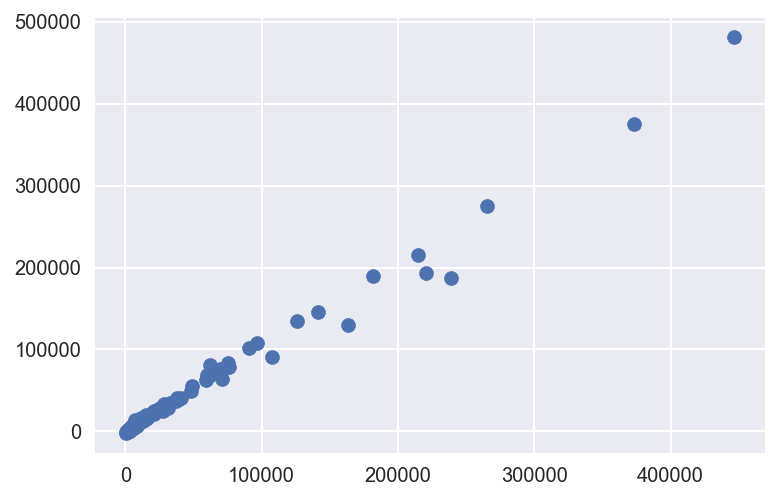

In [116]:
plt.scatter(y_test, y_pred)

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


Based on the predictors and various models that were formed, it can be concluded that Bottles Sold, Number of Stores per Zip Code, Volume Sold, Avg Sales per Store in each Zip Code are very strongly correlated to Total Sales. All four of these predictors were taken into account in order to predict Total Sales. Particular Zip Codes to build future liquor stores will be discussed in the executive summary.  

In [117]:
iowa_liquor.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost ($),State Bottle Retail ($),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),State Profit Per Bottle ($)
360448,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1032200.0,IMPORTED VODKA - MISC,395,35147,Three Olives Mango Flavored Vodka,750,9.96,14.94,12,179.28,9.0,2.38,4.98
360449,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,260,37417,Popov Vodka 80 Prf,1000,5.50,8.25,12,99.00,12.0,3.17,2.75
360450,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1011300.0,TENNESSEE WHISKIES,85,86672,Jack Daniel's Tennessee Honey,1000,18.38,27.57,12,330.84,12.0,3.17,9.19
360451,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1032200.0,IMPORTED VODKA - MISC,395,36384,Three Olives Strawberry,750,9.96,14.94,12,179.28,9.0,2.38,4.98
360452,2016-02-01,3952,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,9.25,13.88,12,166.56,12.0,3.17,4.63


In [118]:
a = iowa_liquor[iowa_liquor['Zip Code'] == 50314]


In [119]:
a['Category Name'].value_counts()

VODKA 80 PROOF                        125
VODKA FLAVORED                         98
IMPORTED VODKA - MISC                  96
TEQUILA                                95
CANADIAN WHISKIES                      89
IMPORTED GRAPE BRANDIES                83
STRAIGHT BOURBON WHISKIES              71
IMPORTED VODKA                         69
AMERICAN DRY GINS                      65
AMERICAN GRAPE BRANDIES                55
MISC. IMPORTED CORDIALS & LIQUEURS     52
PUERTO RICO & VIRGIN ISLANDS RUM       49
FLAVORED RUM                           46
WHISKEY LIQUEUR                        44
BLENDED WHISKIES                       40
CREAM LIQUEURS                         32
SPICED RUM                             27
SCOTCH WHISKIES                        27
SINGLE MALT SCOTCH                     24
TENNESSEE WHISKIES                     23
MISC. AMERICAN CORDIALS & LIQUEURS     20
AMERICAN COCKTAILS                     20
IMPORTED DRY GINS                      19
IRISH WHISKIES                    

In [120]:
b = iowa_liquor[iowa_liquor['Zip Code'] == 50320]
b['Category Name'].value_counts()

VODKA 80 PROOF                        76
VODKA FLAVORED                        73
TEQUILA                               70
IMPORTED VODKA - MISC                 66
CANADIAN WHISKIES                     59
STRAIGHT BOURBON WHISKIES             57
MISC. IMPORTED CORDIALS & LIQUEURS    52
PUERTO RICO & VIRGIN ISLANDS RUM      47
FLAVORED RUM                          46
SPICED RUM                            39
WHISKEY LIQUEUR                       33
BLENDED WHISKIES                      32
IMPORTED VODKA                        28
SCOTCH WHISKIES                       26
AMERICAN DRY GINS                     26
IMPORTED GRAPE BRANDIES               25
CREAM LIQUEURS                        24
MISC. AMERICAN CORDIALS & LIQUEURS    23
AMERICAN GRAPE BRANDIES               21
TRIPLE SEC                            20
IMPORTED SCHNAPPS                     17
IMPORTED DRY GINS                     15
TENNESSEE WHISKIES                    14
IRISH WHISKIES                        13
COFFEE LIQUEURS 

In [121]:
c = iowa_liquor[iowa_liquor['Zip Code'] == 52807]
c['Category Name'].value_counts()

VODKA 80 PROOF                        165
VODKA FLAVORED                        101
STRAIGHT BOURBON WHISKIES              84
CANADIAN WHISKIES                      67
IMPORTED VODKA                         61
TEQUILA                                59
BLENDED WHISKIES                       53
IMPORTED GRAPE BRANDIES                49
MISC. IMPORTED CORDIALS & LIQUEURS     47
AMERICAN DRY GINS                      46
WHISKEY LIQUEUR                        43
SCOTCH WHISKIES                        43
SPICED RUM                             42
CREAM LIQUEURS                         42
AMERICAN COCKTAILS                     41
AMERICAN GRAPE BRANDIES                40
PUERTO RICO & VIRGIN ISLANDS RUM       39
IMPORTED VODKA - MISC                  38
FLAVORED RUM                           38
TENNESSEE WHISKIES                     22
100 PROOF VODKA                        21
SINGLE MALT SCOTCH                     19
IRISH WHISKIES                         19
COFFEE LIQUEURS                   

In [122]:
d = iowa_liquor[iowa_liquor['Zip Code'] == 50311]
d['Category Name'].value_counts()

VODKA 80 PROOF                        164
CANADIAN WHISKIES                      90
STRAIGHT BOURBON WHISKIES              81
VODKA FLAVORED                         63
IMPORTED VODKA                         59
IMPORTED VODKA - MISC                  55
TEQUILA                                49
AMERICAN DRY GINS                      46
BLENDED WHISKIES                       44
WHISKEY LIQUEUR                        43
SPICED RUM                             42
AMERICAN GRAPE BRANDIES                41
SCOTCH WHISKIES                        41
MISC. IMPORTED CORDIALS & LIQUEURS     40
PUERTO RICO & VIRGIN ISLANDS RUM       35
AMERICAN COCKTAILS                     35
IMPORTED GRAPE BRANDIES                30
TENNESSEE WHISKIES                     29
IRISH WHISKIES                         27
CREAM LIQUEURS                         26
FLAVORED RUM                           25
SINGLE MALT SCOTCH                     24
MISC. AMERICAN CORDIALS & LIQUEURS     21
IMPORTED DRY GINS                 

# Executive Summary

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

##  Introduction

A dataset of State to Store Liquor transactions across Iowa was provided for analysis. Given this dataset, it was myself and my team's mission to prodivde insight on where to open a future liquor store in the state of Iowa that will prove to be the most profitable. 


## Overview

The dataset included variables such as how much, in dollars, each store has spent on liquor, the volume each store has acquired, the state profit margin on each transaction, the number of bottles acquired by each store from the state, and a geographical location of stores by county, zip code, and city. The variables were targeted at predicting Total Sales. Various types of models were produced in order to determine how to best predict a future location. In particular, the model types included a Multiple Linear Regression, Train-Test K-Folds Cross Validation, a Lasso Regression, and a Ridge Regression model were produced.  

## Summary of Results

It was concluded that a Ridge Regression Model, with predictors including: Number of Stores per Zip Code, the total Volume of liquor acquired from the State per Zip Code, the Bottles Sold per Zip Code, the State Profit per transaction, and Average Sales per Store per Zip Code, was the best fit model to predict Total Sales for a given zip code. The Ridge Regression model. The model brought back the following coefficients for each predictor:

State Profit Per Bottle ($): -0.42704864351091054
Volume Sold (Liters): 12.252467873356473
Number of Stores Per Zip: -586.63409384884949
Bottles Sold: 3.6659224682493536
Sales Per Store: 0.43884914740620878

These coefficients represent the strength and direction of influence the predictor has on Total Sales. As proven, as the number of stores in each zip code increases by one unit, the Total Sales for each store in that Zip Code decrease tremendously. In other words, as more competitors (liquor stores) are added to the field, the profits for each existing competitor decline. Based on these predictors and coefficients, four zip codes in particular were narrowed down as the best locations to open a future liquor store. Zip Codes 50314, 50320, 52807, and 50311. Each of these Zip Codes has very few liquor stores in the area, but a high number of Bottles Sold, Volume Sold, and Sales per Store average.

## Future Studies 

Moving forward, in order to better fit a model to predict the most lucrative location for a new store, a dataset of Liquor Store to customer transactions would be investigated. With the current dataset in addition to the second, a classification system will be used to categorize various liquor stores and predict what class a future liquor store will fall in based on location. 
 